# TAXONOMICAL CLASSIFICATION OF BIRD ORDERS
Arif Çakır

E-mail: cakirar19@itu.edu.tr



## Importing Necessary Libraries 

In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import colorcet as cc
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.cluster import DBSCAN
import operator

## Data Preparation and Exploratory Data Analysis
In this part, dataset is imported from datadryad.org, and then prepared for analysis.

In [47]:
df = pd.read_excel("https://datadryad.org/stash/downloads/file_stream/401942").dropna()
df.head()   

,class,order,family,genus,spp,species,clutch.size,max.longevity,incubation,dev.mode,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin,qc,sample.size,references
1,Aves,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,SA,32.00,4.86920,40.00,452.000,wild,acceptable,medium,"1, 2 & 3"
2,Aves,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,SA,41.65,8.16368,58.00,988.750,wild,acceptable,medium,"1, 2 & 3"
3,Aves,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,SA,24.25,2.31028,19.30,138.500,wild,acceptable,medium,"1, 2 & 3"
5,Aves,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,A,16.00,0.94276,3.15,30.175,wild,acceptable,medium,"1, 2 & 3"
6,Aves,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,A,13.50,0.46620,1.65,11.900,wild,acceptable,medium,"1, 2 & 3"


Due to "references", "sample.size" and "qc" columns are being not relevant to the project, they are dropped from the dataset. Also, rows with questionable, low or high quality control score ("qc" column) are removed from the dataset. 

In [48]:
df = df[df["qc"]== "acceptable"].drop(["references","sample.size","qc"],axis=1) 
#only took acceptable rows and dropped irrelevant parts from dataset
df.head()

,class,order,family,genus,spp,species,clutch.size,max.longevity,incubation,dev.mode,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin
1,Aves,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,SA,32.00,4.86920,40.00,452.000,wild
2,Aves,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,SA,41.65,8.16368,58.00,988.750,wild
3,Aves,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,SA,24.25,2.31028,19.30,138.500,wild
5,Aves,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,A,16.00,0.94276,3.15,30.175,wild
6,Aves,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,A,13.50,0.46620,1.65,11.900,wild


Gathering statistical information:

In [49]:
df.describe()

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.078823,21.104239,22.679160,35.863940,4.500832,33.081590,648.917593
std,2.088563,13.989003,10.069559,25.808779,5.088058,49.867546,1315.777309
min,1.000000,3.000000,10.500000,8.500000,0.155400,0.500000,3.142500
25%,2.750000,11.000000,14.000000,16.387500,0.991837,3.168750,34.975000
50%,4.000000,18.000000,21.325000,29.250000,2.481220,12.450000,132.875000
75%,4.900000,26.700000,28.000000,46.000000,5.959590,44.625000,696.234408
max,14.000000,120.000000,72.000000,180.000000,32.696160,331.000000,10500.000000


In [50]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 619
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            500 non-null    object 
 1   order            500 non-null    object 
 2   family           500 non-null    object 
 3   genus            500 non-null    object 
 4   spp              500 non-null    object 
 5   species          500 non-null    object 
 6   clutch.size      500 non-null    float64
 7   max.longevity    500 non-null    float64
 8   incubation       500 non-null    float64
 9   dev.mode         500 non-null    object 
 10  fledging.age     500 non-null    float64
 11  brain.mass       500 non-null    float64
 12  egg.mass         500 non-null    float64
 13  body.mass        500 non-null    float64
 14  specimen.origin  500 non-null    object 
dtypes: float64(7), object(8)
memory usage: 62.5+ KB


In [51]:
df.nunique()

class                1
order               27
family              98
genus              329
spp                439
species            500
clutch.size        170
max.longevity      293
incubation         146
dev.mode             4
fledging.age       198
brain.mass         367
egg.mass           392
body.mass          474
specimen.origin      3
dtype: int64

<AxesSubplot:>

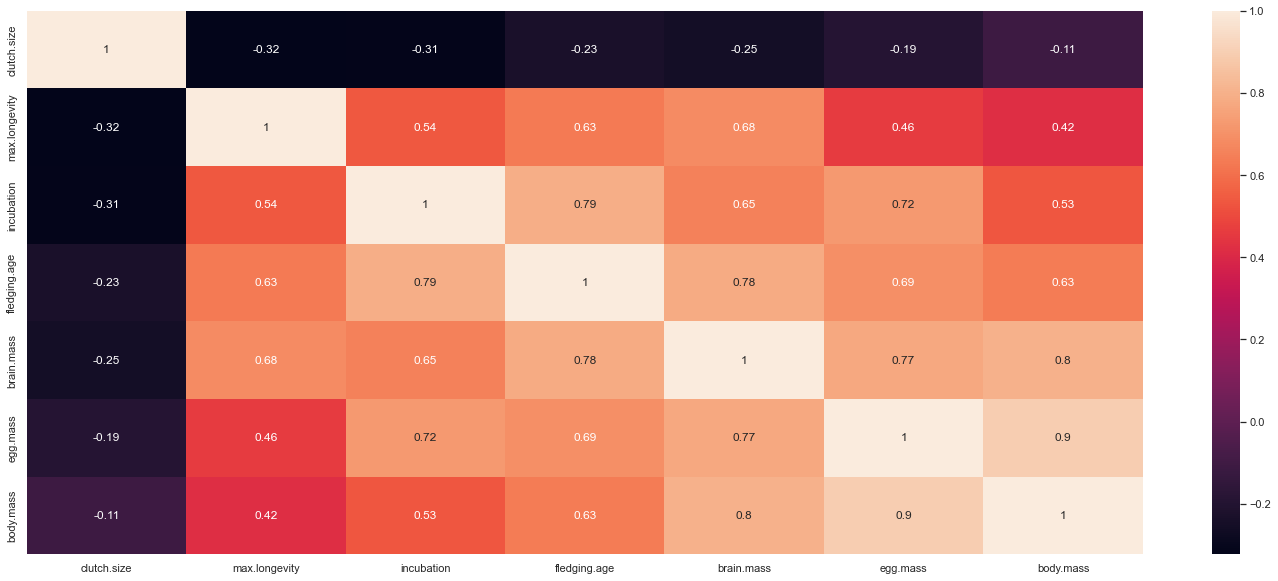

In [52]:
sns.set(rc={'figure.figsize':(25,10)})

sns.heatmap(df.corr(),annot=True)

There seems no over-corralated columns. Only egg mass and body mass are corralated but I decided to leave them.

The column named "class" is dropped from dataset due to the fact that all birds are a "bird".

In [53]:
df = df.drop("class",axis=1)
df

,order,family,genus,spp,species,clutch.size,max.longevity,incubation,dev.mode,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin
1,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,SA,32.00,4.86920,40.000,452.000000,wild
2,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,SA,41.65,8.16368,58.000,988.750000,wild
3,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,SA,24.25,2.31028,19.300,138.500000,wild
5,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,A,16.00,0.94276,3.150,30.175000,wild
6,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,A,13.50,0.46620,1.650,11.900000,wild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Passeriformes,Emberizidae,Zonotrichia,albicollis,Zonotrichia_albicollis,4.07,14.916667,13.00,A,10.00,1.08780,2.770,25.350000,wild
616,Passeriformes,Emberizidae,Zonotrichia,leucophrys,Zonotrichia_leucophrys,3.95,13.340000,12.60,A,10.00,1.00492,2.830,27.960000,wild
617,Passeriformes,Turdidae,Zoothera,naevia,Zoothera_naevia,3.00,5.600000,14.00,A,14.00,1.77156,7.300,79.225000,wild
618,Passeriformes,Zosteropidae,Zosterops,japonicus,Zosterops_japonicus,3.15,5.100000,11.00,A,10.00,0.55944,1.130,11.250000,wild


"specimen.origin" has 3 different values and "dev.mode" has 4 different values and none of them are numerical values, because of that they got one hot encoded.

In [54]:
df = pd.get_dummies(df,columns = ["specimen.origin","dev.mode"])
df

,order,family,genus,spp,species,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,32.00,4.86920,40.000,452.000000,0,0,1,0,0,1,0
2,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,41.65,8.16368,58.000,988.750000,0,0,1,0,0,1,0
3,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,24.25,2.31028,19.300,138.500000,0,0,1,0,0,1,0
5,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,16.00,0.94276,3.150,30.175000,0,0,1,1,0,0,0
6,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,13.50,0.46620,1.650,11.900000,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Passeriformes,Emberizidae,Zonotrichia,albicollis,Zonotrichia_albicollis,4.07,14.916667,13.00,10.00,1.08780,2.770,25.350000,0,0,1,1,0,0,0
616,Passeriformes,Emberizidae,Zonotrichia,leucophrys,Zonotrichia_leucophrys,3.95,13.340000,12.60,10.00,1.00492,2.830,27.960000,0,0,1,1,0,0,0
617,Passeriformes,Turdidae,Zoothera,naevia,Zoothera_naevia,3.00,5.600000,14.00,14.00,1.77156,7.300,79.225000,0,0,1,1,0,0,0
618,Passeriformes,Zosteropidae,Zosterops,japonicus,Zosterops_japonicus,3.15,5.100000,11.00,10.00,0.55944,1.130,11.250000,0,0,1,1,0,0,0


## Hierarchial Clustering and SVM

In this part second part of the project is made. Firstly data got 

### 2.1: Hierarchial Clustering

In [55]:

dfh = df.iloc[:,5:] # Prepared dataset for hierarchial clustering, removed clusters. 
dfh

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,4.35,20.333333,29.75,32.00,4.86920,40.000,452.000000,0,0,1,0,0,1,0
2,3.50,22.000000,34.75,41.65,8.16368,58.000,988.750000,0,0,1,0,0,1,0
3,4.25,19.900000,33.00,24.25,2.31028,19.300,138.500000,0,0,1,0,0,1,0
5,4.20,10.083333,14.50,16.00,0.94276,3.150,30.175000,0,0,1,1,0,0,0
6,5.50,11.833333,13.50,13.50,0.46620,1.650,11.900000,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,4.07,14.916667,13.00,10.00,1.08780,2.770,25.350000,0,0,1,1,0,0,0
616,3.95,13.340000,12.60,10.00,1.00492,2.830,27.960000,0,0,1,1,0,0,0
617,3.00,5.600000,14.00,14.00,1.77156,7.300,79.225000,0,0,1,1,0,0,0
618,3.15,5.100000,11.00,10.00,0.55944,1.130,11.250000,0,0,1,1,0,0,0


## Dimensional Reducing
In this part, dimensional reducing is applied to the dataset for identifying clusters.

In [56]:
scaler = StandardScaler()
dfh_scaled = scaler.fit_transform(dfh)
dfh_normalized = normalize(dfh_scaled)

In [57]:
dfh_n = pd.DataFrame(dfh_normalized)
dfh_n

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.043753,-0.018570,0.236628,-0.050451,0.024397,0.046751,-0.050432,-0.194362,-0.093770,0.231998,-0.375196,-0.163044,0.807718,-0.117139
1,-0.085016,0.019643,0.367729,0.068773,0.220835,0.153286,0.079229,-0.176931,-0.085361,0.211193,-0.341549,-0.148423,0.735283,-0.106634
2,0.026044,-0.027355,0.325698,-0.142995,-0.136808,-0.087820,-0.123269,-0.183280,-0.088424,0.218770,-0.353804,-0.153748,0.761666,-0.110460
3,0.025536,-0.346740,-0.357496,-0.338744,-0.307777,-0.264171,-0.206967,-0.253851,-0.122470,0.303006,0.394504,-0.212948,-0.183252,-0.152992
4,0.278718,-0.271456,-0.373385,-0.354932,-0.324800,-0.258174,-0.198305,-0.236249,-0.113978,0.281996,0.367149,-0.198182,-0.170546,-0.142383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.001821,-0.190630,-0.414271,-0.431902,-0.289099,-0.261968,-0.204248,-0.248578,-0.119927,0.296713,0.386310,-0.208525,-0.179446,-0.149814
496,-0.026072,-0.234610,-0.423106,-0.423606,-0.290431,-0.256428,-0.199487,-0.243803,-0.117623,0.291014,0.378890,-0.204520,-0.176000,-0.146937
497,-0.212403,-0.455744,-0.354425,-0.348352,-0.220573,-0.212593,-0.178039,-0.237171,-0.114423,0.283097,0.368583,-0.198956,-0.171212,-0.142940
498,-0.164401,-0.422930,-0.428767,-0.370465,-0.286364,-0.236862,-0.179156,-0.213218,-0.102867,0.254506,0.331358,-0.178863,-0.153921,-0.128503


<AxesSubplot:>

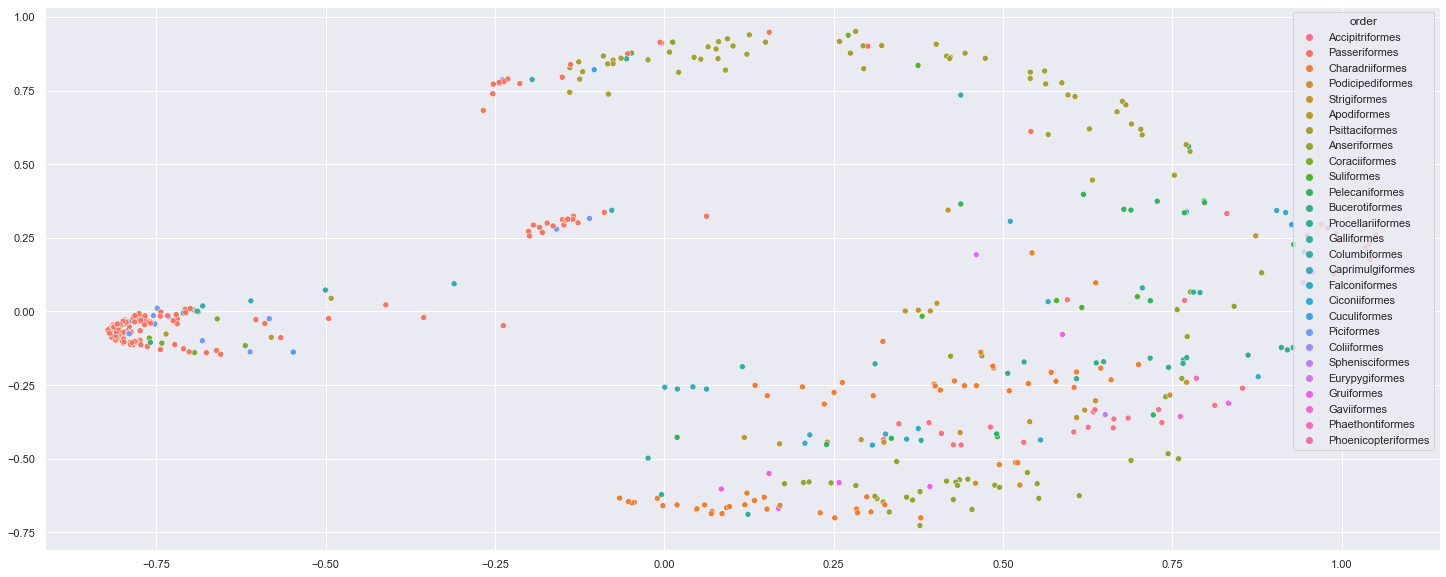

In [58]:

sns.set(rc={'figure.figsize':(25,10)})

pca = PCA(n_components=2)
pcadf = pca.fit_transform(dfh_n)

sns.scatterplot(x=pcadf[:,0],y=pcadf[:,1],hue=df['order'])

Due to PCA failing to separate different types of birds, Linear Discriminant Analysis will be tried to visualize next.

<AxesSubplot:>

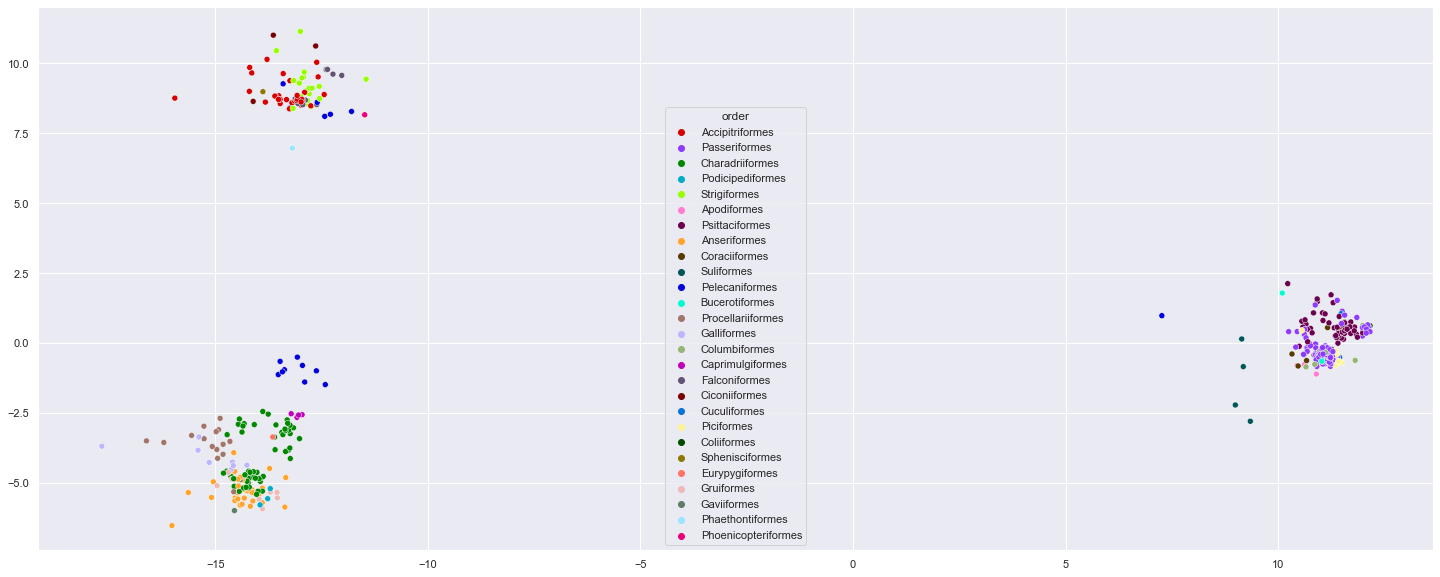

In [59]:

lda = LDA()
ldadf = lda.fit_transform(dfh, df["order"])
blobs, labels = make_blobs(n_samples=1000, centers=27, center_box=(-100, 100)) #https://stackoverflow.com/questions/68209351/how-to-make-a-color-map-with-many-unique-colors-in-seaborn
palette = sns.color_palette(cc.glasbey, n_colors=27) #needed to do different color palette because default sns palettes are for 12 colors.
sns.scatterplot(x=ldadf[:,0], y=ldadf[:,1], hue=df['order'],palette=palette)

It can be seen that LDA seperates the dataset to only three parts. But when LDA is studied closely, distinct orders have similar properties. For example, a group of birds mostly contain birds which live watery places such as pelecaniformes (pelicans, tropic bird and relatives), charadriformes (sandpipers, gulls, plovers and relatives), sphenisciformes (Penguins). Furthermore, another group of birds mostly contain large predatory birds such as Acciptriformes (eagles, vultures, hawkeyes and relatives), Pelecaniformes (whose some relatives are big predotary birds), Falconiformes (Falcons). Finally, a grop of birds mostly contain smaller birds such as Passeriformes (perching birds), Psittaciformers (Parrots and relatives) and Piciformes (woodpeckers and relatives).
This kind of distinction seperates these bird orders into three different groups and makes it easier to group.

In [60]:

aggclustering = AgglomerativeClustering(n_clusters=3)
aggdf = aggclustering.fit(dfh)
print(aggdf.labels_)

[1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1
 2 1 2 0 1 1 1 1 1 0 0 2 2 2 2 2 1 1 2 1 1 1 1 1 1 1 2 1 2 1 0 1 1 1 1 2 1
 1 2 0 1 2 2 2 1 1 1 2 0 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 0 1 1 1 1 1 1 1 1 1 2 2
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 0 0 0 1 1 2 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2
 2 0 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 2 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 0 0 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 1 1 1 1 1 0 1 1 1 

In [61]:
print("Number of elements of clusters: ",dict(Counter(aggdf.labels_)))

Number of elements of clusters:  {1: 405, 2: 66, 0: 29}


I used Silhoutte Score for the accuracy test.

In [62]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score: {silhouette_score(dfh, aggdf.labels_)}')
hiearchial_df = dfh

Silhouette Score: 0.7208817302289313


In [63]:
dfh["Hierarchial Clusters"] = aggdf.labels_
dfh


,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP,Hierarchial Clusters
1,4.35,20.333333,29.75,32.00,4.86920,40.000,452.000000,0,0,1,0,0,1,0,1
2,3.50,22.000000,34.75,41.65,8.16368,58.000,988.750000,0,0,1,0,0,1,0,2
3,4.25,19.900000,33.00,24.25,2.31028,19.300,138.500000,0,0,1,0,0,1,0,1
5,4.20,10.083333,14.50,16.00,0.94276,3.150,30.175000,0,0,1,1,0,0,0,1
6,5.50,11.833333,13.50,13.50,0.46620,1.650,11.900000,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,4.07,14.916667,13.00,10.00,1.08780,2.770,25.350000,0,0,1,1,0,0,0,1
616,3.95,13.340000,12.60,10.00,1.00492,2.830,27.960000,0,0,1,1,0,0,0,1
617,3.00,5.600000,14.00,14.00,1.77156,7.300,79.225000,0,0,1,1,0,0,0,1
618,3.15,5.100000,11.00,10.00,0.55944,1.130,11.250000,0,0,1,1,0,0,0,1


### 2.2: Support Vector Machines

In this part, Support Vector Machines (SVM) method is going to be used.

In [64]:
df.head()

,order,family,genus,spp,species,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,32.00,4.86920,40.00,452.000,0,0,1,0,0,1,0
2,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,41.65,8.16368,58.00,988.750,0,0,1,0,0,1,0
3,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,24.25,2.31028,19.30,138.500,0,0,1,0,0,1,0
5,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,16.00,0.94276,3.15,30.175,0,0,1,1,0,0,0
6,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,13.50,0.46620,1.65,11.900,0,0,1,1,0,0,0


In [65]:
def bootstrap(X,y,model):
    res = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
        model.fit(X_train,y_train)
        res.append(model.score(X_test,y_test))
    tmp = sorted(res)[3:97]
    return (min(tmp),max(tmp))

In [66]:
clf = svm.SVC(kernel='linear') #best fit kernel, others fit around 0.3
y = df.iloc[:,0]
X = df.iloc[:,5:]
minsvc, maxsvc = bootstrap(X,y,clf) #took 6 mins
(minsvc,maxsvc)

(0.736, 0.848)

It can be seen that SVM method is really good for predicting order of the species, it returns accuracy scores between %70 to %90. This great gap between scores is due to evenly split of bird species in orders. When some of bird orders have only two species in them, some of them have include dozens of species. A confusion matrix and classfication report of random test is presented below in order to addres this issue.

SVM score:  0.832


c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classif

                   precision    recall  f1-score   support

  Accipitriformes       0.88      0.70      0.78        10
     Anseriformes       0.64      1.00      0.78         7
      Apodiformes       0.00      0.00      0.00         0
   Bucerotiformes       0.00      0.00      0.00         1
 Caprimulgiformes       0.67      1.00      0.80         2
  Charadriiformes       0.86      0.80      0.83        15
    Ciconiiformes       0.00      0.00      0.00         1
      Coliiformes       0.00      0.00      0.00         1
    Columbiformes       1.00      0.71      0.83         7
    Coraciiformes       1.00      0.50      0.67         4
     Cuculiformes       0.00      0.00      0.00         0
   Eurypygiformes       0.00      0.00      0.00         1
    Falconiformes       0.50      1.00      0.67         2
      Galliformes       1.00      1.00      1.00         1
      Gaviiformes       0.00      0.00      0.00         1
       Gruiformes       1.00      0.33      0.50       

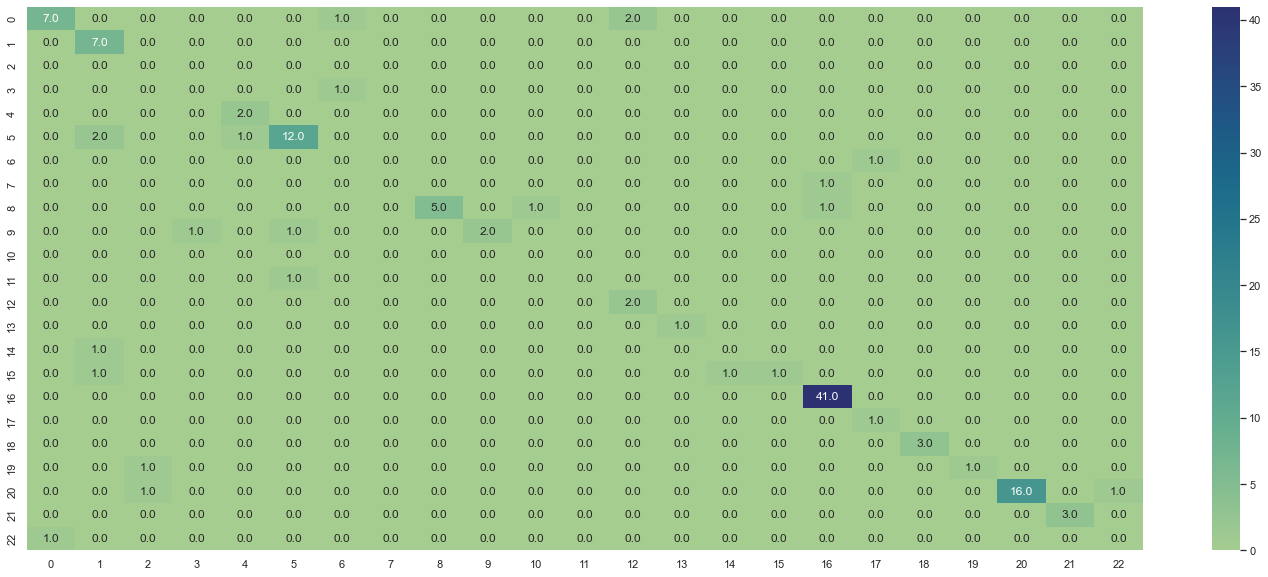

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("SVM score: ", clf.score(X_test,y_test))
sns.heatmap(cm,annot=True,cmap= "crest",fmt=".1f")
print(classification_report(y_test,y_pred))

It can be seen that species are not evenly choosen.

## K-Means, Decision Tree and DBSCAN

### 3.1: K-Means

In [68]:
dfkm = dfh.drop("Hierarchial Clusters",axis = 1) #going back to hiearcihal dataset and removing old clusters
dfkm.head()

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,4.35,20.333333,29.75,32.00,4.86920,40.00,452.000,0,0,1,0,0,1,0
2,3.50,22.000000,34.75,41.65,8.16368,58.00,988.750,0,0,1,0,0,1,0
3,4.25,19.900000,33.00,24.25,2.31028,19.30,138.500,0,0,1,0,0,1,0
5,4.20,10.083333,14.50,16.00,0.94276,3.15,30.175,0,0,1,1,0,0,0
6,5.50,11.833333,13.50,13.50,0.46620,1.65,11.900,0,0,1,1,0,0,0


Furthermore, in addition to silhouette score, 

In [69]:

kmeans = KMeans(n_clusters=3,algorithm='auto')
kmeans.fit(dfkm)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 2 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 2 1 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2
 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

In [70]:
print(f'K Means Silhouette Score: {silhouette_score(dfkm, kmeans.labels_)}')

K Means Silhouette Score: 0.8012730840848574


It can be seen that K-Means algorithm has slightly better Silhouette score compared to hierarchial clustering. Furthermore, I wanted to compare fit of K-means to previous hierarchial clustering.

In [71]:

score = []
maximum = 0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(dfkm,dfh['Hierarchial Clusters'],train_size=0.75)
    kmeans.fit(X_train)
    X_pred = kmeans.predict(X_test)
    score.append(metrics.accuracy_score(y_test,X_pred))
    if score[i]>maximum:
        maximum = score[i]
        maxpred = kmeans.predict(X)

score.sort(reverse = True)
mean = np.mean(score)
differences = np.abs(score - mean)
index = np.argmin(differences)
score = score[0:index]
print(min(score),max(score))

0.216 0.992


Due to K-Means naming clusters randomly, sometimes clusters fit with %0 accuracy and sometimes fit with %100 accuracy. But due to mean of score values is near 0.7, it can be seen that those two models supports each other.

In [72]:
kmeans = KMeans(n_clusters=3,algorithm='auto')
kmeans.fit(dfkm)
dfh["K Means Clusters"] = kmeans.labels_
dfh.head()

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP,Hierarchial Clusters,K Means Clusters
1,4.35,20.333333,29.75,32.00,4.86920,40.00,452.000,0,0,1,0,0,1,0,1,0
2,3.50,22.000000,34.75,41.65,8.16368,58.00,988.750,0,0,1,0,0,1,0,2,0
3,4.25,19.900000,33.00,24.25,2.31028,19.30,138.500,0,0,1,0,0,1,0,1,0
5,4.20,10.083333,14.50,16.00,0.94276,3.15,30.175,0,0,1,1,0,0,0,1,0
6,5.50,11.833333,13.50,13.50,0.46620,1.65,11.900,0,0,1,1,0,0,0,1,0


### 3.2: Decision Trees

In [73]:
df.head()

,order,family,genus,spp,species,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,32.00,4.86920,40.00,452.000,0,0,1,0,0,1,0
2,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,41.65,8.16368,58.00,988.750,0,0,1,0,0,1,0
3,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,24.25,2.31028,19.30,138.500,0,0,1,0,0,1,0
5,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,16.00,0.94276,3.15,30.175,0,0,1,1,0,0,0
6,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,13.50,0.46620,1.65,11.900,0,0,1,1,0,0,0


In [74]:

decisiontree= tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
y = df.iloc[:,0]
X = df.iloc[:,5:]
mindt, maxdt =bootstrap(X,y,decisiontree)
(mindt,maxdt)

(0.632, 0.784)

Decision Tree has accuracy score closer to SVM but slightly less accurate

[Text(697.5, 475.65000000000003, 'X[10] <= 0.5\nentropy = 3.491\nsamples = 375\nvalue = [23, 28, 3, 1, 2, 46, 3, 1, 9, 9, 4, 1, 6, 6\n1, 8, 123, 13, 1, 1, 9, 3, 13, 42, 1, 15, 3]'),
 Text(348.75, 339.75, 'X[12] <= 0.5\nentropy = 3.242\nsamples = 171\nvalue = [23, 28, 0, 0, 2, 46, 3, 0, 0, 0, 0, 1, 6, 6\n1, 8, 0, 13, 1, 1, 0, 3, 13, 0, 1, 15, 0]'),
 Text(174.375, 203.85000000000002, 'X[0] <= 4.1\nentropy = 2.487\nsamples = 116\nvalue = [0, 28, 0, 0, 2, 46, 0, 0, 0, 0, 0, 1, 0, 6\n1, 8, 0, 8, 0, 0, 0, 3, 13, 0, 0, 0, 0]'),
 Text(87.1875, 67.94999999999999, 'entropy = 2.112\nsamples = 81\nvalue = [0, 3, 0, 0, 2, 46, 0, 0, 0, 0, 0, 1, 0, 1\n1, 3, 0, 8, 0, 0, 0, 3, 13, 0, 0, 0, 0]'),
 Text(261.5625, 67.94999999999999, 'entropy = 1.149\nsamples = 35\nvalue = [0, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5\n0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(523.125, 203.85000000000002, 'X[2] <= 29.25\nentropy = 2.245\nsamples = 55\nvalue = [23, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0\n0, 0, 0, 5, 1, 1,

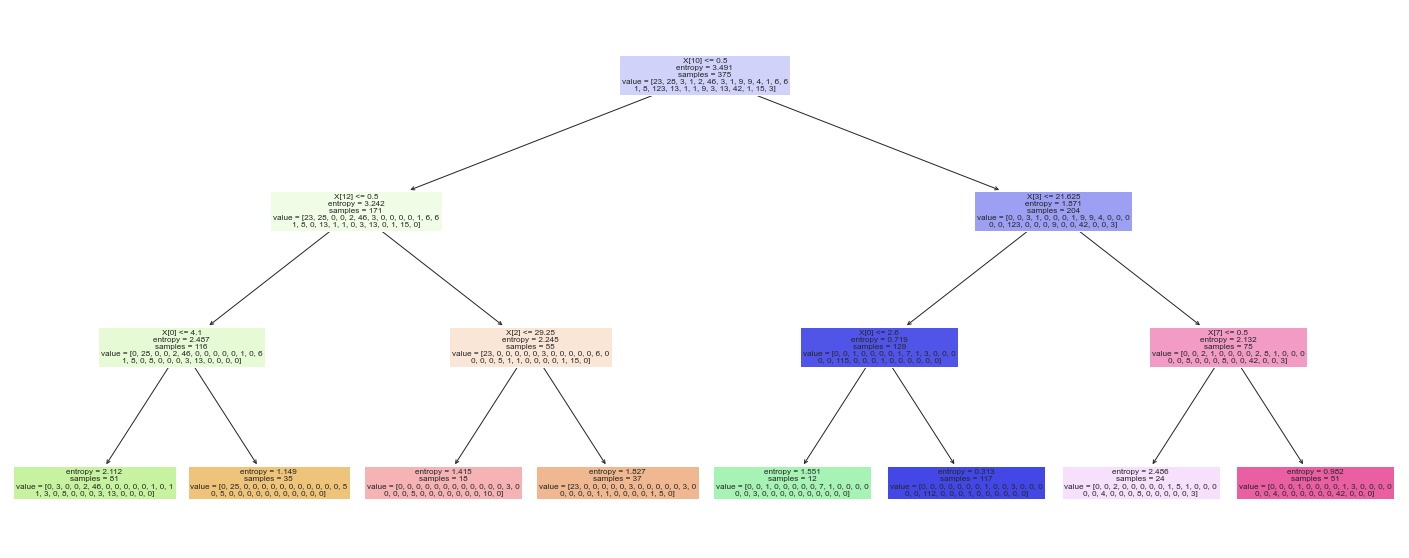

In [75]:
tree.plot_tree(decisiontree,filled = True)

### 3.3: DBSCAN

Finally in this part DBSCAN algorithm will be used on dateset.

In [76]:
dfh

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP,Hierarchial Clusters,K Means Clusters
1,4.35,20.333333,29.75,32.00,4.86920,40.000,452.000000,0,0,1,0,0,1,0,1,0
2,3.50,22.000000,34.75,41.65,8.16368,58.000,988.750000,0,0,1,0,0,1,0,2,0
3,4.25,19.900000,33.00,24.25,2.31028,19.300,138.500000,0,0,1,0,0,1,0,1,0
5,4.20,10.083333,14.50,16.00,0.94276,3.150,30.175000,0,0,1,1,0,0,0,1,0
6,5.50,11.833333,13.50,13.50,0.46620,1.650,11.900000,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,4.07,14.916667,13.00,10.00,1.08780,2.770,25.350000,0,0,1,1,0,0,0,1,0
616,3.95,13.340000,12.60,10.00,1.00492,2.830,27.960000,0,0,1,1,0,0,0,1,0
617,3.00,5.600000,14.00,14.00,1.77156,7.300,79.225000,0,0,1,1,0,0,0,1,0
618,3.15,5.100000,11.00,10.00,0.55944,1.130,11.250000,0,0,1,1,0,0,0,1,0


In [77]:
dfdbscan = dfh.drop(['Hierarchial Clusters',"K Means Clusters"], axis =1) #I have zero idea why don't I use a clear base dataset
dfdbscan.head()

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,4.35,20.333333,29.75,32.00,4.86920,40.00,452.000,0,0,1,0,0,1,0
2,3.50,22.000000,34.75,41.65,8.16368,58.00,988.750,0,0,1,0,0,1,0
3,4.25,19.900000,33.00,24.25,2.31028,19.30,138.500,0,0,1,0,0,1,0
5,4.20,10.083333,14.50,16.00,0.94276,3.15,30.175,0,0,1,1,0,0,0
6,5.50,11.833333,13.50,13.50,0.46620,1.65,11.900,0,0,1,1,0,0,0


In [78]:

listdict = []
for i in np.arange(0.25, 15, 0.25):
    for j in range(3,15):
        dbscan = DBSCAN(eps =i ,min_samples=j,algorithm="auto").fit(dfdbscan)
        listdict.append( dict(Counter(dbscan.labels_))) 
listdict.sort(key=operator.itemgetter(-1))
print(*listdict, sep = "\n ") #what was I thinking when writing dbscan to proposal


{-1: 223, 0: 255, 1: 3, 2: 6, 3: 3, 4: 5, 5: 5}
 {-1: 225, 0: 249, 1: 3, 2: 6, 3: 5, 4: 3, 5: 5, 6: 4}
 {-1: 225, 0: 254, 1: 3, 2: 6, 3: 3, 4: 5, 5: 4}
 {-1: 231, 0: 246, 1: 3, 2: 6, 3: 5, 4: 3, 5: 3, 6: 3}
 {-1: 237, 0: 33, 1: 213, 2: 3, 3: 5, 4: 3, 5: 3, 6: 3}
 {-1: 240, 2: 8, 0: 213, 1: 25, 3: 5, 5: 3, 4: 3, 6: 3}
 {-1: 240, 0: 33, 1: 213, 2: 5, 4: 3, 3: 3, 5: 3}
 {-1: 240, 0: 36, 1: 213, 3: 5, 2: 6}
 {-1: 241, 0: 36, 1: 213, 3: 5, 2: 5}
 {-1: 241, 0: 36, 1: 213, 3: 5, 2: 5}
 {-1: 244, 3: 8, 0: 209, 2: 4, 1: 24, 4: 5, 6: 3, 5: 3}
 {-1: 244, 1: 32, 0: 214, 3: 5, 2: 5}
 {-1: 247, 1: 30, 0: 214, 3: 6, 2: 3}
 {-1: 247, 0: 31, 1: 213, 3: 6, 2: 3}
 {-1: 248, 0: 209, 4: 4, 1: 21, 2: 7, 3: 5, 6: 3, 5: 3}
 {-1: 249, 0: 209, 4: 3, 1: 21, 2: 7, 3: 5, 6: 3, 5: 3}
 {-1: 249, 0: 209, 4: 3, 1: 21, 2: 7, 3: 5, 6: 3, 5: 3}
 {-1: 249, 1: 28, 0: 214, 3: 5, 2: 4}
 {-1: 250, 2: 4, 0: 213, 1: 24, 3: 5, 4: 4}
 {-1: 250, 1: 29, 0: 213, 2: 5, 3: 3}
 {-1: 250, 1: 29, 0: 213, 2: 5, 3: 3}
 {-1: 251, 0: 209, 4:

It can clearly be seen that DBSCAN is not the correct algorithm for this dataset. More than half of the rows in the dataset are classified as noise for each epsilon value between 0.25 to 15 and minimum samples between 3 to 15. Furthermore, all other avaliable metrics are tried for the model but left from the notebook for the sake of space. DBSCAN fails to cluster the dataset like K-means or Hierarchial Clustering do, because of that, it is not fit to this dataset.

## CONCLUSION

In [79]:
dfclusters = dfh
dfclusters.head()

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP,Hierarchial Clusters,K Means Clusters
1,4.35,20.333333,29.75,32.00,4.86920,40.00,452.000,0,0,1,0,0,1,0,1,0
2,3.50,22.000000,34.75,41.65,8.16368,58.00,988.750,0,0,1,0,0,1,0,2,0
3,4.25,19.900000,33.00,24.25,2.31028,19.30,138.500,0,0,1,0,0,1,0,1,0
5,4.20,10.083333,14.50,16.00,0.94276,3.15,30.175,0,0,1,1,0,0,0,1,0
6,5.50,11.833333,13.50,13.50,0.46620,1.65,11.900,0,0,1,1,0,0,0,1,0


In [80]:
print('Agglomerative Clustering Silhouette Score:',silhouette_score(hiearchial_df, aggdf.labels_))
print("SVM score: ",(minsvc+maxsvc)/2)
print("K-Means algorithm silhouette score: ", silhouette_score(dfkm,kmeans.labels_))
print("Decision Tree score: ", (mindt+maxdt)/2)


Agglomerative Clustering Silhouette Score: 0.7208819229397098
SVM score:  0.792
K-Means algorithm silhouette score:  0.8012730840848574
Decision Tree score:  0.708


All in all, the score values are as presented. For classification problems, SVM is the best fitting algorithm in this problem. For classification problems, K-Means algorithm is the best fitting algorithm. The Hypothesis of this project was "Bird species can be distinguished and predicted with the help of their physiological and ethological characteristics". Even though, hypothesis that says bird species can be clustered alike their orders is failed, still birds can be clustered by their physical and ethological characteristics. Furthermore, second hypothesis that says bid species can be classified by their orders is succeed. This project can be improved with a better dataset that contains not just mean properties of bird species but individual members of the birds. An ETL part can be added for this purpose.